In [1]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Regularization

In this course, we will speak about bias and variance, and the related issues of over and underfitting.

Then we will talk about how to handle these issues with regularization

# I. Bias & Variance introduction

<center>
    <img src="https://drive.google.com/uc?export=view&id=1yHalKWkEF-h-HIOf3l7V7kFBWDQy1zXt" width="600">
<center/>

A good model is a model able to **generalize** to new data (and therefore to generalize some solution).

<center>
<img src="https://drive.google.com/uc?export=view&id=1zp3-OvgyEEkXhpNV_qIbeZrns7vGOBWq" width="700">
<center/>

Bias and variance can be seen differently depending on whether the model is a **classification** or a **regression**, even though this is the same mechanism.

- In a **classification problem** :
<center>
<img src="https://drive.google.com/uc?export=view&id=1MQD5UZigevDU4542iMpPJZWardglwQyO" width="700">
<center/>

- In a **regression problem** :
<center>
<img src="https://drive.google.com/uc?export=view&id=1yT0bXLUs0fJvVLjhWumndL2FPaRSv2zk" width="700">
<center/>

## I.1. The Bias-Variance compromise

Another way of seeing it, would be to look at this chart:

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1cRT8QaY8kWWauZJ9iWCVRk6CkfBhv7Xr" width="600">
</p>

But why is it called **Bias** and **Variance**? Let's consider an archer aiming for a target 🎯

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1KD2aWehs1RpHxnYlwbi0ghwykSZqJYiy" width="500">
</p>

## I.2. Underfitting & Overfitting

- **High variance** means you **overfit**: basically your are too close to the training data, you won't be able to generalize well.

- **High bias** means your model **does not fit your data**. No matter how hard you try, you won't be able to perform good predictions.

### How to diagnose it?

High variance has to be diagnosed by looking at the performance of your model on the train and the validation dataset.

This is another reason why we have to split data.

Let's say we want to perform a binary classification for customer churn.
Let's assume we have the following results with one of our models:

|  Split  | Accuracy |
|---------|----------|
|  Train  |   99 %   |
|  Validation  |   65 %   |

What do you say?
- High variance
- High bias
- Just right

This is a **high variance** case: the model is pretty good on train dataset, but **does not generalize well** at all.

Now with another model we have those results:


|  Split  | Accuracy |
|---------|----------|
|  Train  |   68 %   |
|  Validation  |   67 %   |

What do you say?
- High variance
- High bias
- Just right

This time, depending on the task, this might be a high bias case.

It actually requires more knowledge of the problem and data to conclude, but let's assume it.

Finally, we have a really good working model with the following results:

|  Split  | Accuracy |
|---------|----------|
|  Train  |   93 %   |
|  Valid  |   92 %   |

This seems to be 'just right'.

### The problem of high bias

As mentioned earlier, without knowledge of the problem and expected performances, this might be hard to detect a high bias case. 

Several ways to handle this:
- Always think about human performances: a model should be able to reach human performances on basic tasks
- Think about the data: is there enough features to give an answer?
- Try to improve: do not stop at the first result, try to optimize

## I.3 How to handle underfitting?

Here is a list of possible options :
- Add more features (e.g. feature engineering, more data collection...)
- Try a more complex model
- Less regularization (if possible)

## I.4. How to handle overfitting?

To fix high variance, on the other hand, here are the main leads:
- Add more training data
- Remove extra features (if possible)
- Try a less complex model
- Add regularization

# II. Regularization

Regularization is a way to help the models generalize better.

It is a quite general concept: depending on the model, there might better different ways of regularization.

Regularization **won't improve the training performances**, but might **improve the generalization** performance in test.

## II.1 Ridge regression

Regularization is a way to have a grasp on the bias and variance of our models.

In many models we know, we will only need to play with one positive parameter. 

The idea is to optimize our model by adding a **global weight** to the cost function, leading to **decrease parameters values** of the model.

Ridge Regression penalizes high parameters values by smoothly reducing them.

How does it do that? By modifying the loss function.

As a reminder, here is the MSE, the typical loss function of a regression model:

$$ 
\mathcal{L}_{MSE} = \frac{1}{2m}\sum_i (y^{(i)} - h_\theta(x^{(i)}))^2
$$

Where:
$$
h_\theta(x) = \sum_j \theta_j X_j
$$

And:
- $(i)$ is the sample index
- $m$ is the number of sample
- $j$ is the feature index

In Ridge regression, we will just add a factor to this loss:
$$
\mathcal{L}_{Ridge} = \mathcal{L}_{MSE} + \lambda |\theta|^2 
$$

With $|\theta|^2$ being the L2 norm of $\theta$:
$$
|\theta|^2 = \sum_j \theta_j^2
$$

And $\lambda$ is the so called **regularization parameter**, or sometimes **penalization parameter**:
- A large $\lambda$ means large regularization: it will add bias to the model
- A small $\lambda$ means small regularization

Ridge regression is just a classical regression with **L2 regularization**.

With such a loss function, one can guess that the parameters **$\theta$ will be less likely to have large values**.

Therefore, by forcing the parameters $\theta$ to small values, our model might be more robust and less likely to overfit.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1fomvSycAtYnIVpEinfZvUioYz4ZjIRy5">
</p> 

The Ridge regression can easily be implemented in `scikit-learn`, with the following signature:

```python
class sklearn.linear_model.Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver=’auto’, random_state=None)
```

 > the parameter `alpha` is the regularization parameter here

## II.2 LASSO Regression

The **LASSO Regression** stands for Least Absolute Shrinkage and Selection Operator.

Unlike Ridge regression, it does not add **quadratic** (square) values to the cost function, but **absolute** values: $\lambda |\theta|$.

Thus, the loss of LASSO will be the following:
$$
\mathcal{L}_{Ridge} = \mathcal{L}_{MSE} + \lambda |\theta|
$$

with $|\theta|$ being the L1 norm of $\theta$:
$$
|\theta| = \sum_j |\theta_j|
$$

This is thus a regression with **L1 regularization**. The effect of L1 regularization is to regularize less smoothly, and set parameters close to 0 much faster.

Thus, by setting some parameters to 0, it allows feature selection.

<p align="center">
<img src="https://drive.google.com/uc?export=view&id=1w0aMoRPntloGzNXTfE1vmd9W_m1Hd7Lx">
</p>


The LASSO regression can easily be implemented in `scikit-learn`, with the following signature:

```python
class sklearn.linear_model.Lasso(alpha=1.0, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection=’cyclic’)
```

Again, the parameter `alpha` is the regularization parameter.

Intuitively:
* if $\lambda$ = 0: there is no regularization, too complex models may overfit
* if $\lambda$ is large: high regularization, all $\theta$ values will tend to 0, models may have a high bias

## II.3. Elastic Net

One last regularization model is the so called **Elastic Net**. Besides its fancy name, this method is just adding **both L1 and L2 regularization**.


Then the loss of Elastic Net will be the following:
$$
\mathcal{L}_{ElasticNet} = \mathcal{L}_{MSE} + \lambda_1 |\theta| + \lambda_2 |\theta|^2
$$

We now have two hyperparameters:
- $\lambda_1$ for the L1 regularization
- $\lambda_2$ for the L2 regularization

The Elastic Net regression is in `scikit-learn`, with the following signature:
```python
class sklearn.linear_model.ElasticNet(alpha=1.0, *, l1_ratio=0.5, fit_intercept=True, normalize=False, precompute=False, max_iter=1000, copy_X=True, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
```

This time the two hyperparameters for regularization are the following:
- `alpha` is the global regularization 
- `l1_ratio` sets the level of L1 and L2 regularization, 0.5 for both, 1 for only L1, 0 for only L2 regularization

## II.4. Logistic Regression and regularization

Regularization can also be used with a Logistic Regression.
In the signature of the Logistic Regression on `scikit-learn`, the regularization parameter is called `C`:

```python
class sklearn.linear_model.LogisticRegression(penalty=’l2’, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver=’warn’, max_iter=100, multi_class=’warn’, verbose=0, warm_start=False, n_jobs=None)
```

Like for the linear regression, one can choose the penalty type:
- either `penalty=’l2’` for Ridge-like, L2 regularization
- or `penalty=’l1’` for LASSO like, L1 regularization

> Warning: Lower the `C`, higher the regularization

## II.5. SVM and regularization

Regularization is also available with SVM. Just like logistic regression, the parameter name is `C`:

```python
class sklearn.svm.SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto_deprecated’, coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)
```

> Same warning: `C<<1` means high regularization

# III. Visual example

## III.1 Input data

We will see how to apply regularization methods on an example.

Let's use the following data:

[]

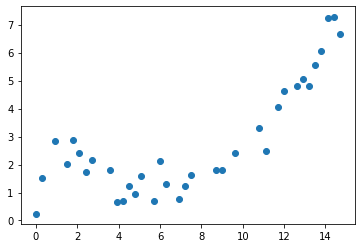

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Let's create the data
X = np.arange(0, 15, 0.3)
y = 4*np.sqrt(X) - 2*X + 0.1*X*X + np.random.normal(0, .5, len(X))

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Plot the data
plt.scatter(X_train, y_train)
plt.plot()

## III.2 High bias

Let's first try to use a normal linear regression.

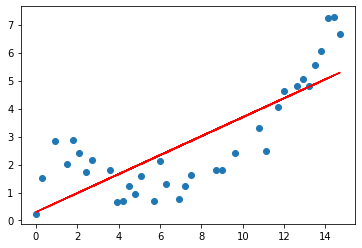

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train.reshape(-1, 1), y_train)

y_train_pred = reg.predict(X_train.reshape(-1, 1))

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, color='red')
plt.show()

This is a good example of high bias: as you can see, the results are not very good.

Let's check the mean squared error on the train and test sets:

In [4]:
from sklearn.metrics import mean_squared_error

print('MSE on train:', mean_squared_error(y_train, y_train_pred))
print('MSE on test:', mean_squared_error(y_test, reg.predict(X_test.reshape(-1, 1))))

MSE on train: 1.4580509955479881
MSE on test: 1.4109194023707592


As you can see, the Mean Squared Error (MSE) is the same on both sets, and pretty bad (though it depends on the project).

Let's now try to add more features to reduce the bias.

## III.3 High variance

Instead of trying to fit only on X, we will fit on X, X$^2$, X$^3$, X$^4$, X$^5$, X$^6$, X$^7$, X$^8$, X$^9$ and see how it works!

This is an extreme feature engineering, just for the sake of the example:

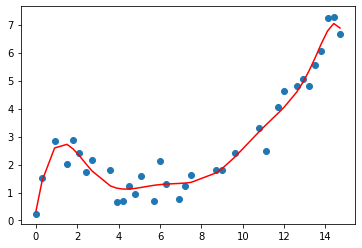

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

def powerize(X_train):
    return np.transpose(np.array([X_train, np.power(X_train, 2), np.power(X_train, 3), 
                        np.power(X_train, 4), np.power(X_train, 5), np.power(X_train, 6),
                        np.power(X_train, 7), np.power(X_train, 8), np.power(X_train, 9)]))

reg.fit(powerize(X_train), y_train)

y_train_pred = reg.predict(powerize(np.sort(X_train)))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

Okay it seems better this way, at least there is not much bias!

Let's check how it performs on the test set:

In [6]:
print('MSE on train:', mean_squared_error(y_train, reg.predict(powerize(X_train))))
print('MSE on test:', mean_squared_error(y_test, reg.predict(powerize(X_test))))

MSE on train: 0.15614406160150252
MSE on test: 0.2313511920282517


A huge improvement has been reached compared to previous example:
- MSE on train decreased from 1.45 to 0.16

**But** there is overfitting:
- The MSE on test is 50% greater than on train

## III.4. Regularization

For the sake of the exercise, we will try to add regularization (although here, we could clearly reduce the number of features...).

Let's try the Ridge and LASSO regressions!

MSE on train: 0.36569829319022423
MSE on test: 0.24623662729079845


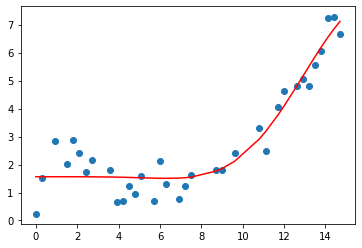

In [7]:
from sklearn.linear_model import Ridge

# Let's try first with a very large regularization and see what it does
ridge = Ridge(alpha=1000000000)

ridge.fit(powerize(X_train), y_train)

y_train_pred = ridge.predict(powerize(np.sort(X_train)))

print('MSE on train:', mean_squared_error(y_train, ridge.predict(powerize(X_train))))
print('MSE on test:', mean_squared_error(y_test, ridge.predict(powerize(X_test))))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

Too much regularization: we actually added bias here by regularization: we miss the pattern at low X values.

Let's try a much lower value now:

MSE on train: 0.19469757190148054
MSE on test: 0.1858791917534245


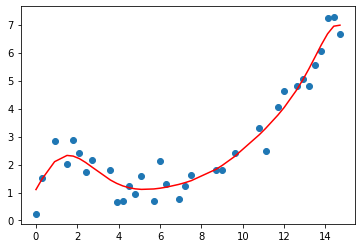

In [8]:
# Let's try with a much lower regularization and see what it does
ridge = Ridge(alpha=0.5)

ridge.fit(powerize(X_train), y_train)

y_train_pred = ridge.predict(powerize(np.sort(X_train)))

print('MSE on train:', mean_squared_error(y_train, ridge.predict(powerize(X_train))))
print('MSE on test:', mean_squared_error(y_test, ridge.predict(powerize(X_test))))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

That looks much better: now the MSE on test is as low as 0.186, compared to our previous best of about 0.23!

Just out of curiosity, let's try now to do the same with LASSO regularization:

MSE on train: 0.3285433988517019
MSE on test: 0.20624203217927584


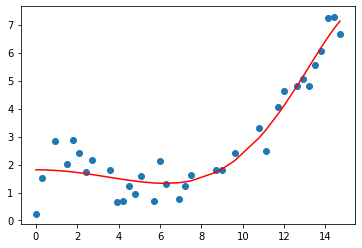

In [9]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.5)

lasso.fit(powerize(X_train), y_train)

y_train_pred = lasso.predict(powerize(np.sort(X_train)))

print('MSE on train:', mean_squared_error(y_train, lasso.predict(powerize(X_train))))
print('MSE on test:', mean_squared_error(y_test, lasso.predict(powerize(X_test))))

plt.scatter(X_train, y_train)
plt.plot(np.sort(X_train), y_train_pred, color='red')
plt.show()

Well, not as good as the Ridge regression. But to compare properly we would need to optimize the regularization parameter.

## Conclusion

Just a summary table as conclusion:

<center>
<img src="https://drive.google.com/uc?export=view&id=118s1aYXhuptWpf1KPyOxmR9PZLv_6TNr" width="500">
<center/>